In [1]:
# Step 1: Importing libraries and loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset (replace 'path_to_dataset' with the actual path of your downloaded dataset)
df = pd.read_csv('Customer_support_data.csv')

# Display the first few rows of the dataset
df.head()

# Check for missing values
print(df.isnull().sum())

# Handling missing values by dropping rows or filling with median (if any)
df = df.dropna()  # Alternatively: df.fillna(df.median(), inplace=True)

# Basic information about the dataset
df.info()


Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 13565 to 85016
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                38 non-null     object 
 1   channel_name             38 non-null     object 
 2   c

In [3]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
13565,08c6a929-a403-4f14-810f-2275fe591230,Outcall,Returns,Return request,Good,0258d703-8287-428d-9e48-446e29eec3e5,29/07/2023 03:44,05/08/2023 11:11,05/08/2023 11:50,05-Aug-23,BETTIAH,Electronics,899.0,367.0,Katelyn Horton,Mason Gupta,Olivia Tan,0-30,Morning,5
13603,eae37bb3-91ec-4154-ba3c-7e4a6309a946,Outcall,Returns,Return request,Not good,d5d704c1-7d8e-4573-8e9d-aec29e6d3b40,31/07/2023 20:21,04/08/2023 12:04,05/08/2023 07:02,05-Aug-23,PATNA,Electronics,899.0,604.0,Michael Ruiz,Madison Kim,John Smith,>90,Morning,2
18445,296c5c93-6a4f-4fa5-b276-3feecfeaf636,Outcall,Returns,Return request,Call was helpful.,6a318938-1b06-4394-82d7-83a0d7c18f29,29/07/2023 22:52,09/08/2023 12:40,09/08/2023 12:43,09-Aug-23,AGRA,Electronics,868.0,233.0,Dillon Miller,Mason Gupta,Olivia Tan,0-30,Morning,4
19678,5155d369-7bc3-4c40-9e26-6dcee58ace99,Outcall,Returns,Return request,Good service,feb6c5f8-5418-4abc-aec4-494ce0df2791,01/08/2023 13:35,08/08/2023 12:35,08/08/2023 12:39,08-Aug-23,Birbhum,Electronics,899.0,458.0,Dillon Miller,Mason Gupta,Olivia Tan,0-30,Morning,5
20080,ddaae943-3535-452e-857f-591d4b9ae0c8,Outcall,Cancellation,Return cancellation,Thanks,68b1ae3c-a0f9-48c7-96f0-2e17a460814c,03/08/2023 13:42,07/08/2023 13:55,08/08/2023 09:21,08-Aug-23,BAREILLY,Electronics,799.0,362.0,Patricia Cross,Mason Gupta,Olivia Tan,0-30,Afternoon,5


In [2]:
import pandas as pd

def calculate_mean(df, column_name):
    """
    Calculate the mean of a specified column in a DataFrame without using built-in functions.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to calculate statistics on.

    Returns:
    mean (float): Mean of the column.
    """
    # Extract the column values as a list
    values = df[column_name].tolist()
    # Calculate the mean by summing all values and dividing by the count
    total = 0
    count = 0
    for value in values:
        total += value
        count += 1
    mean = total / count
    return mean

def calculate_variance(df, column_name):
    """
    Calculate the variance of a specified column in a DataFrame without using built-in functions.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to calculate statistics on.

    Returns:
    var (float): Variance of the column.
    """
    # Extract the column values as a list
    values = df[column_name].tolist()
    # Calculate the mean using the calculate_mean function
    mean = calculate_mean(df, column_name)
    # Calculate the variance
    total = 0
    count = 0
    for value in values:
        total += (value - mean) ** 2
        count += 1
    var = total / count
    return var

def calculate_standard_deviation(df, column_name):
    """
    Calculate the standard deviation of a specified column in a DataFrame without using built-in functions.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to calculate statistics on.

    Returns:
    std (float): Standard deviation of the column.
    """
    # Calculate the variance using the calculate_variance function
    var = calculate_variance(df, column_name)
    # Calculate the standard deviation as the square root of the variance
    std = var ** 0.5
    return std


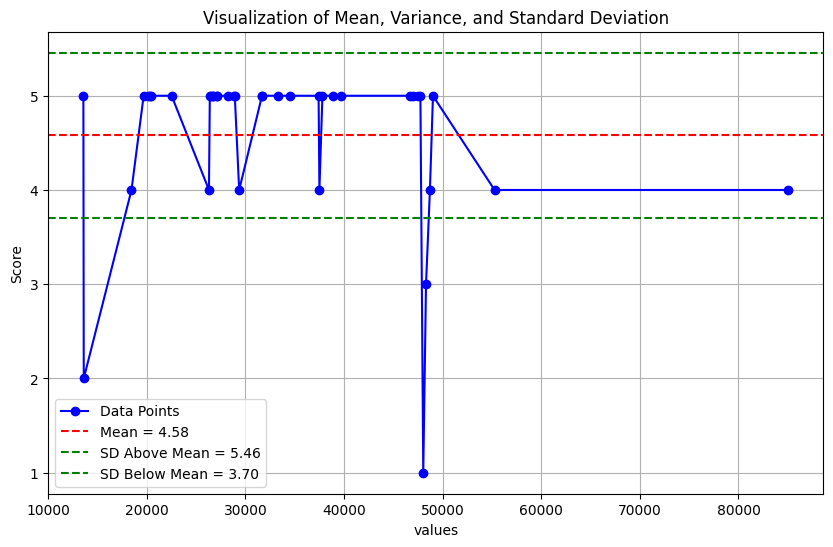

In [8]:
mean = calculate_mean(df, 'CSAT Score')
variance = calculate_variance(df, 'CSAT Score')
std_dev = calculate_standard_deviation(df, 'CSAT Score')

# Plotting the data points with mean, variance and standard deviation
plt.figure(figsize=(10, 6))
plt.plot(df['CSAT Score'], marker='o', linestyle='-', color='b', label='Data Points')
plt.axhline(y=mean, color='r', linestyle='--', label=f'Mean = {mean:.2f}')
plt.axhline(y=mean + std_dev, color='g', linestyle='--', label=f'SD Above Mean = {mean + std_dev:.2f}')
plt.axhline(y=mean - std_dev, color='g', linestyle='--', label=f'SD Below Mean = {mean - std_dev:.2f}')
plt.title('Visualization of Mean, Variance, and Standard Deviation')
plt.xlabel('values')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
def calculate_five_number_summary(df, column_name):
    """
    Calculate the 5-number summary of a specified column in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to calculate the 5-number summary on.

    Returns:
    summary (dict): A dictionary containing the min, Q1, median, Q3, and max values.
    """
    values = sorted(df[column_name].tolist())  # Sort the column values

    # Helper function to find the median of a list
    def median(data):
        n = len(data)
        mid = n // 2
        if n % 2 == 0:
            return (data[mid - 1] + data[mid]) / 2
        else:
            return data[mid]

    n = len(values)
    q1 = median(values[:n // 2])
    q3 = median(values[(n + 1) // 2:])

    summary = {
        'Minimum': values[0],
        'Q1': q1,
        'Median': median(values),
        'Q3': q3,
        'Maximum': values[-1]
    }

    return summary

# Calculating the 5-number summary
summary = calculate_five_number_summary(df, 'connected_handling_time')
print("5-Number Summary:", summary)


5-Number Summary: {'Minimum': 45.0, 'Q1': 299.0, 'Median': 365.5, 'Q3': 460.0, 'Maximum': 732.0}


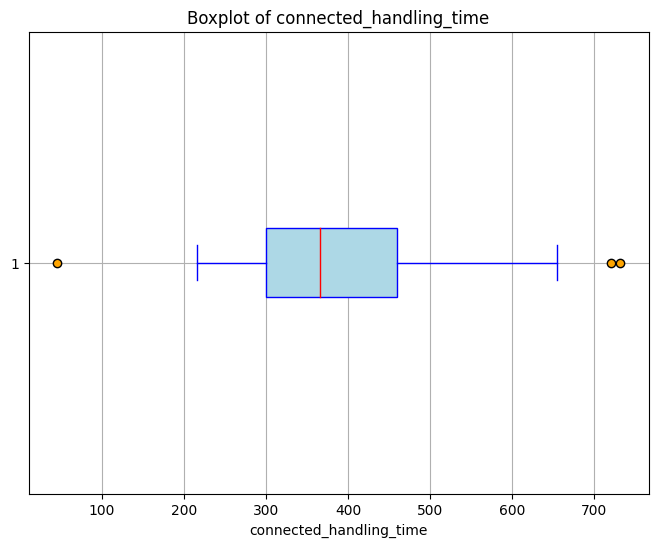

In [7]:
# Boxplot visualization
plt.figure(figsize=(8, 6))
plt.boxplot(df['connected_handling_time'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
            medianprops=dict(color='red'), flierprops=dict(markerfacecolor='orange', marker='o'))
plt.title('Boxplot of connected_handling_time')
plt.xlabel('connected_handling_time')
plt.grid(True)
plt.show()

1. **Comparing the mean and median of the CSAT Scores, what can you infer about the distribution of customer satisfaction? Is it skewed or relatively symmetric?**

Answer: If the mean CSAT Score is significantly higher or lower than the median, it suggests that the distribution is skewed.

For example:
If the mean is greater than the median, the distribution is right-skewed (positively skewed), indicating that more customers gave low ratings, with some high scores pulling the average up.

If the mean is less than the median, the distribution is left-skewed (negatively skewed), indicating that most ratings are high, but some low scores are pulling the average down.

If the mean and median are close, the distribution is likely symmetric.


2. **How does the variance and standard deviation of connected handling times inform us about the consistency of service provided by agents? What could be potential reasons for high variability?**

Answer: High variance and standard deviation in connected handling times indicate that there is significant inconsistency in the time taken by agents to resolve issues. This could be due to several factors, including:


Variability in Issue Complexity: Some issues might be straightforward, while others require more time, leading to wide discrepancies in handling times.


Agent Experience: Variations in agent skills and experience levels could cause differences in how efficiently they handle customer issues.
System or Process

Delays: Technical issues, slow processes, or inefficiencies in the system might contribute to longer handling times.